# Simulating and studying an AR process

In [2]:
import numpy as np
from pandas import DataFrame as df
import importlib
import autoregressive as ar

In [3]:
importlib.reload(ar) # if autoregressive.py is modified 

<module 'autoregressive' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\autoregressive.py'>

In [4]:
model = ar.AutoRegressive(steps=1_000, paths=9, a=np.array([0.2, 0.2, 0.1, 0.4, -0.3, -0.2]), start=0, dist='normal')
data = model.generate()

100%|██████████| 995/995 [00:00<00:00, 107871.50it/s]

9 different AR(5) processes of 997 steps have been generated with increments following normal distribution


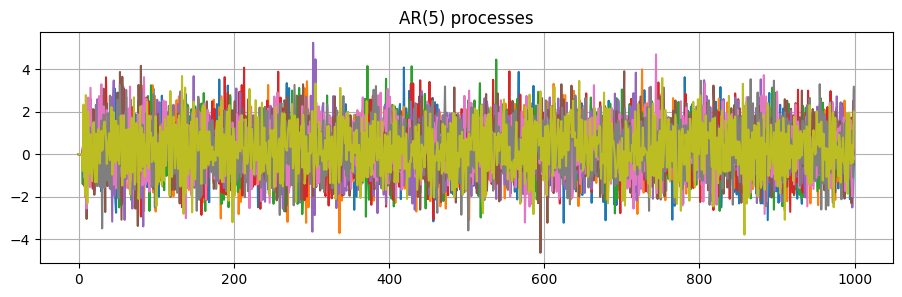

In [5]:
model.plot_paths()

In [ ]:
integrated_vol = model.get_integrated_volatility()
df(integrated_vol).head()

,0,1,2,3,4,5,6,7,8
0,1500.347835,1388.614804,1556.060428,1406.711334,1564.023136,1536.292452,1469.805043,1402.185279,1451.108787


In [22]:
coefficients = model.fit_ar()
df(coefficients).head()

,0,1,2,3,4,5,6,7,8
0,0.142210,0.213109,0.177299,0.146197,0.267272,0.267993,0.218753,0.204235,0.191584
1,0.267855,0.174085,0.228605,0.233181,0.188739,0.127457,0.207225,0.231528,0.152568
2,0.101721,0.103789,0.077480,0.088749,0.080955,0.104356,0.083846,0.099869,0.073065
3,0.415782,0.380576,0.406241,0.403845,0.373846,0.332594,0.438605,0.358290,0.410765
4,-0.261185,-0.291521,-0.319539,-0.329017,-0.288937,-0.274692,-0.290644,-0.302298,-0.281530


In [27]:
comparison = np.vstack([model.coefficients.mean(axis=1), model.a, model.coefficients.mean(axis=1) - model.a])
df(comparison.T).rename(columns={0: 'Average estimated coefficients', 1: 'Real coefficients', 2: 'Difference'})

,Average estimated coefficients,Real coefficients,Difference
0,0.203184,0.2,0.003184
1,0.201249,0.2,0.001249
2,0.090426,0.1,-0.009574
3,0.391172,0.4,-0.008828
4,-0.293263,-0.3,0.006737
5,-0.184373,-0.2,0.015627


100%|██████████| 995/995 [00:00<00:00, 186910.27it/s]



RESIDUALS DIAGNISTIC




DESCRIPTIVE STATISTICS


,0,1,2,3,4,5,6,7,8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000008,0.000790,-0.000390,0.000468,-0.001318,-0.000272,-0.000225,0.000596,0.000181
std,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500
min,-3.397517,-3.795367,-3.786990,-3.644343,-2.621774,-2.873671,-3.297465,-3.100045,-3.025757
25%,-0.640947,-0.678711,-0.695503,-0.664267,-0.731186,-0.632572,-0.678669,-0.637315,-0.684354
50%,0.022655,-0.008203,-0.020934,0.026269,-0.058868,0.000000,0.015344,0.000000,-0.002163
75%,0.644155,0.651719,0.728653,0.700498,0.732212,0.680753,0.692635,0.635482,0.693528
max,3.060356,3.143566,2.953002,2.920209,3.297962,3.108177,3.323157,3.074251,3.508268




MOMENTS SUMMARY


,0,1,2,3,4,5,6,7,8
mean,0.000008,0.000790,-0.000390,0.000468,-0.001318,-0.000272,-0.000225,0.000596,0.000181
variance,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skewness,-0.114876,0.080443,0.013798,-0.124824,0.156372,0.006070,-0.038122,0.008639,-0.009362
kurtosis,3.085424,3.020716,2.774471,3.087789,2.793884,2.932270,2.831275,3.019304,2.847289




JARQUE–BERA NORMALITY TEST RESULTS


,0,1,2,3,4,5,6,7,8
jb stat,2.503474,1.096391,2.151043,2.917963,5.845528,0.197283,1.428387,0.027965,0.986303
p value,0.286008,0.577992,0.341120,0.232473,0.053785,0.906067,0.489587,0.986115,0.610699




AUTOCORRELATION FUNCTION (ACF)


,0,1,2,3,4,5,6,7,8
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.189940,-0.178504,-0.245807,-0.187347,-0.176895,-0.209443,-0.219991,-0.175283,-0.214817
2,-0.212882,-0.286728,-0.279342,-0.300236,-0.273750,-0.277767,-0.266793,-0.274211,-0.280216
3,0.426869,0.410532,0.464363,0.428428,0.400725,0.391735,0.478446,0.375319,0.463354
4,-0.049726,0.020606,-0.094190,-0.002662,-0.002096,-0.001227,-0.071927,0.016004,-0.056355
5,0.057295,-0.077362,-0.031638,-0.044979,-0.044595,-0.094084,-0.053518,-0.000454,-0.099399
6,0.071032,0.076522,0.141335,0.119022,0.135845,0.095469,0.186382,0.083058,0.174354
7,-0.048562,0.026555,-0.081713,-0.029440,-0.024598,-0.023558,-0.070979,-0.045198,-0.013045
8,0.110584,0.066073,0.097217,0.008658,0.016453,-0.001830,-0.005240,0.062224,-0.008547
9,-0.035980,-0.060203,0.019487,0.079857,0.091808,0.007475,0.146149,0.041465,0.038299


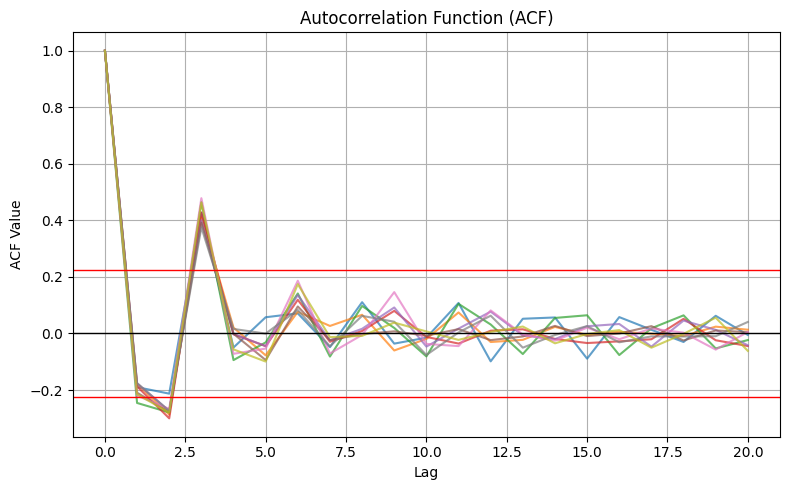



QQ Plots


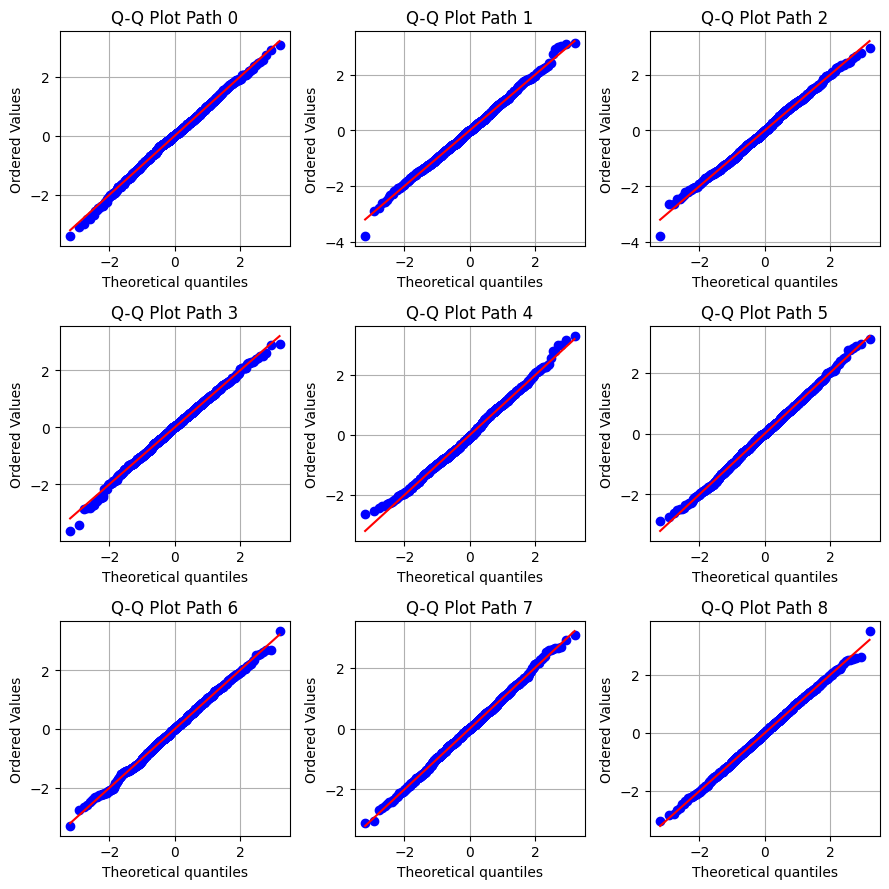

In [26]:
eps, eta = model.get_residuals()
model.study_residuals()